In [44]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [45]:
from IPython.display import display
from sklearn.externals import joblib
from collections import Counter

basepath = os.path.expanduser('../')

In [46]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## Load Data

In [47]:
%%time

app_train   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_train.pkl'))
app_test    = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_test.pkl'))

# additional tables

bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau.pkl'))
bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/previous_application.pkl'))
installments = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/installments_payments.pkl')) 
pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/POS_CASH_balance.pkl'))
credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/credit_card_balance.pkl'))

CPU times: user 547 ms, sys: 2.51 s, total: 3.06 s
Wall time: 40.7 s


In [95]:
mask = app_train.TARGET == 1
SK_ID_CURR = app_train[mask].sample().SK_ID_CURR.values[0]; SK_ID_CURR

183894

In [96]:
display_all(app_train.loc[app_train.SK_ID_CURR == SK_ID_CURR].T)

,72342
AMT_ANNUITY,21109.5
AMT_CREDIT,450000
AMT_GOODS_PRICE,450000
AMT_INCOME_TOTAL,180000
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_YEAR,0


In [97]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR].T)

,78369,78370,78371,78372,78373,1395760
SK_ID_CURR,183894,183894,183894,183894,183894,183894
SK_ID_BUREAU,5256843,5256844,5256845,5256846,5256847,5256842
CREDIT_ACTIVE,Closed,Closed,Closed,Closed,Active,Active
CREDIT_CURRENCY,currency 1,currency 1,currency 1,currency 1,currency 1,currency 1
DAYS_CREDIT,-2056,-2633,-2560,-608,-194,-105
CREDIT_DAY_OVERDUE,0,0,0,0,0,0
DAYS_CREDIT_ENDDATE,-963,-2328,-2192,-243,902,1084
DAYS_ENDDATE_FACT,-963,-2296,-2224,-243,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,NaN,7353,0,0,0,NaN
CNT_CREDIT_PROLONG,0,0,0,0,0,0


In [98]:
display_all(bureau.loc[bureau.SK_ID_CURR == SK_ID_CURR, ['SK_ID_BUREAU']]\
                  .merge(bureau_bal, on=['SK_ID_BUREAU'], how='left').T)

,0,1,2,3,4,5
SK_ID_BUREAU,5256843,5256844,5256845,5256846,5256847,5256842
MONTHS_BALANCE,NaN,NaN,NaN,NaN,NaN,NaN
STATUS,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, :].T)

,492103,791872,1043026,1044105,1426043
SK_ID_PREV,1654759,2418642,1335278,2601201,1648377
SK_ID_CURR,183894,183894,183894,183894,183894
NAME_CONTRACT_TYPE,Consumer loans,Consumer loans,Consumer loans,Consumer loans,Consumer loans
AMT_ANNUITY,NaN,3603.87,6523.42,NaN,8237.07
AMT_APPLICATION,134550,31455,37300.5,34605,82305
AMT_CREDIT,134550,26955,38488.5,34605,74074.5
AMT_DOWN_PAYMENT,0,4500,5580,0,8230.5
AMT_GOODS_PRICE,134550,31455,37300.5,34605,82305
WEEKDAY_APPR_PROCESS_START,SUNDAY,SUNDAY,FRIDAY,SUNDAY,FRIDAY
HOUR_APPR_PROCESS_START,13,16,14,14,15


In [79]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(pos_cash.sort_values(by=['SK_ID_CURR', 'SK_ID_PREV', 'MONTHS_BALANCE'], 
                                                ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,316817,2677669,NaN,NaN,NaN,NaN,NaN,NaN
1,316817,2611825,NaN,NaN,NaN,NaN,NaN,NaN
2,316817,1144091,NaN,NaN,NaN,NaN,NaN,NaN
3,316817,1552533,NaN,NaN,NaN,NaN,NaN,NaN
4,316817,2481127,NaN,NaN,NaN,NaN,NaN,NaN
5,316817,1965790,NaN,NaN,NaN,NaN,NaN,NaN
6,316817,2396890,-24.0,7.0,0.0,Completed,0.0,0.0
7,316817,2396890,-25.0,48.0,42.0,Active,0.0,0.0
8,316817,2396890,-26.0,48.0,43.0,Active,0.0,0.0
9,316817,2396890,-27.0,48.0,44.0,Active,0.0,0.0


In [33]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(credit_bal.sort_values(by=['SK_ID_CURR','SK_ID_PREV','MONTHS_BALANCE'], 
                                                  ascending=[True, True, False]), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left').T) 

,0,1
SK_ID_CURR,327670,327670
SK_ID_PREV,1159631,1665483
MONTHS_BALANCE,NaN,NaN
AMT_BALANCE,NaN,NaN
AMT_CREDIT_LIMIT_ACTUAL,NaN,NaN
AMT_DRAWINGS_ATM_CURRENT,NaN,NaN
AMT_DRAWINGS_CURRENT,NaN,NaN
AMT_DRAWINGS_OTHER_CURRENT,NaN,NaN
AMT_DRAWINGS_POS_CURRENT,NaN,NaN
AMT_INST_MIN_REGULARITY,NaN,NaN


In [78]:
display_all(prev_app.loc[prev_app.SK_ID_CURR == SK_ID_CURR, ['SK_ID_CURR', 'SK_ID_PREV']]\
                    .merge(installments.sort_values(by=['SK_ID_CURR',
                                                        'SK_ID_PREV',
                                                        'NUM_INSTALMENT_NUMBER']), 
                           on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')) 

,SK_ID_CURR,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,316817,2677669,NaN,NaN,NaN,NaN,NaN,NaN
1,316817,2611825,NaN,NaN,NaN,NaN,NaN,NaN
2,316817,1144091,NaN,NaN,NaN,NaN,NaN,NaN
3,316817,1552533,NaN,NaN,NaN,NaN,NaN,NaN
4,316817,2481127,NaN,NaN,NaN,NaN,NaN,NaN
5,316817,1965790,NaN,NaN,NaN,NaN,NaN,NaN
6,316817,2396890,1.0,1.0,-926.0,-956.0,24782.490234,24782.490234
7,316817,2396890,1.0,2.0,-896.0,-914.0,24782.490234,24782.490234
8,316817,2396890,1.0,3.0,-866.0,-877.0,24782.490234,24782.490234
9,316817,2396890,1.0,4.0,-836.0,-849.0,24782.490234,24782.490234


### When did the client opt for first credit with Home Credit ?

In [15]:
join_date = prev_app.loc[(prev_app.NAME_CLIENT_TYPE == 'New') &\
            (prev_app.NAME_CONTRACT_STATUS == 'Approved')].groupby('SK_ID_CURR')['DAYS_DECISION'].max()
join_date = -join_date/365

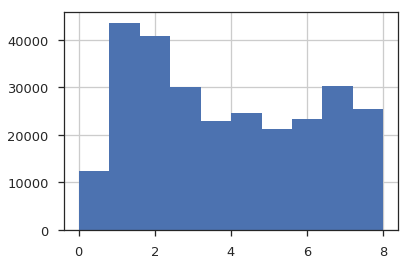

In [17]:
join_date.hist();

In [18]:
join_date = app_train.SK_ID_CURR.map(join_date)
join_date[join_date.isnull()].shape[0] / len(join_date)

0.22936740474324496

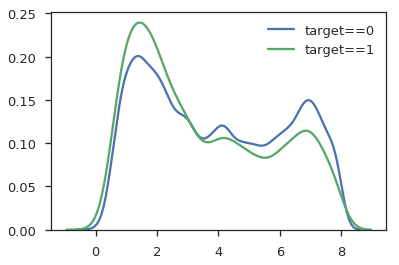

In [21]:
sns.kdeplot(join_date[app_train.TARGET == 0], label='target==0')
sns.kdeplot(join_date[app_train.TARGET == 1], label='target==1');

### Difference between date when a person opted for credit from Home Credit and Employment Date

In [26]:
join_date = prev_app.loc[(prev_app.NAME_CLIENT_TYPE == 'New') &\
            (prev_app.NAME_CONTRACT_STATUS == 'Approved')].groupby('SK_ID_CURR')['DAYS_DECISION'].max()
join_date = -join_date/365
join_date = app_train.SK_ID_CURR.map(join_date)

diff_join_employed_date = (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365) - join_date

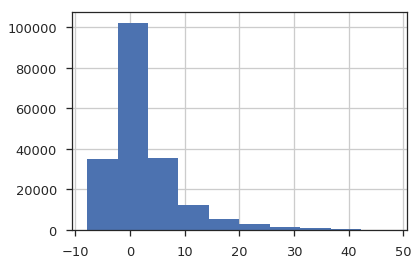

In [29]:
diff_join_employed_date.hist();

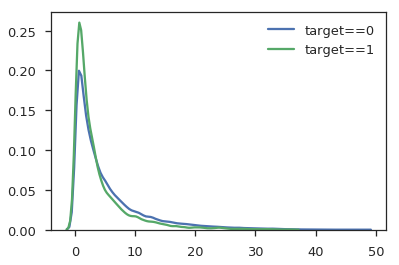

In [36]:
sns.kdeplot(diff_join_employed_date[(diff_join_employed_date > 0) & (app_train.TARGET == 0)], label='target==0')
sns.kdeplot(diff_join_employed_date[(diff_join_employed_date > 0) & (app_train.TARGET == 1)], label='target==1');

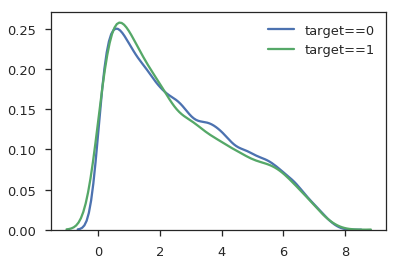

In [37]:
sns.kdeplot((-diff_join_employed_date[(diff_join_employed_date < 0) & (app_train.TARGET == 0)]), label='target==0')
sns.kdeplot((-diff_join_employed_date[(diff_join_employed_date < 0) & (app_train.TARGET == 1)]), label='target==1');

### Relationship between Income and Employment (in Years)

In [41]:
income_emp = (app_train.AMT_INCOME_TOTAL / (-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365))\
             .replace([np.inf, -np.inf], np.nan)

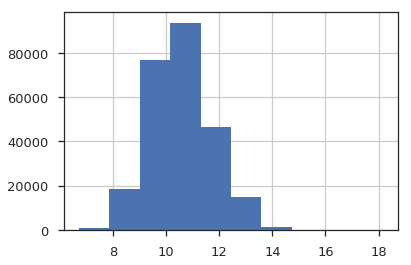

In [44]:
income_emp.map(np.log1p).hist();

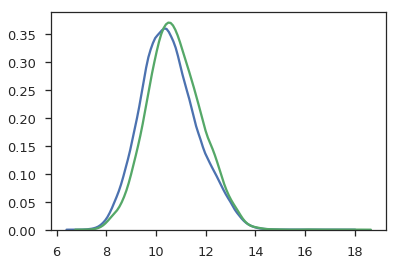

In [45]:
sns.kdeplot(income_emp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(income_emp[app_train.TARGET == 1].map(np.log1p));

### Represent contract status of previous applications as string of characters

In [102]:
%%time

contract_status_str = prev_app.sort_values(by='DAYS_DECISION', ascending=False).groupby('SK_ID_CURR')['NAME_CONTRACT_STATUS']\
                      .apply(lambda x: ''.join([z[0:1] for z in x]))

CPU times: user 1min 21s, sys: 1.87 s, total: 1min 22s
Wall time: 1min 22s


In [103]:
contract_status_str = app_train.SK_ID_CURR.map(contract_status_str)
contract_status_str[contract_status_str.isnull()].shape[0] / len(contract_status_str)

0.05350702901684818

In [104]:
ss = pd.crosstab(contract_status_str, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss.sort_values(by=1, ascending=False))

TARGET                0.0   1.0     ratio
SK_ID_CURR                               
A                   47625  4357  0.083817
AA                  30173  2320  0.071400
AAA                 18340  1194  0.061124
AAAA                10159   567  0.052862
RA                   3615   542  0.130382
CAA                  5554   464  0.077102
CA                   5491   437  0.073718
AAAAA                5470   296  0.051335
ARA                  2663   274  0.093292
CAAA                 3955   260  0.061684
RRA                  1286   222  0.147215
RAA                  1663   204  0.109266
ACA                  1864   173  0.084929
CAAAA                2469   154  0.058711
AAAAAA               2767   150  0.051423
AARA                 1486   134  0.082716
UA                   1180   126  0.096478
CCAA                 1575   124  0.072984
CCA                  1262   114  0.082849
ACAA                 1472   107  0.067764
AR                   1009   107  0.095878
ARAA                 1081   102  0

### Relationship of external scores with months balance from bureau

In [5]:
data_recency = bureau_bal.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].max()
data_recency = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU']].merge(data_recency, how='left')
data_recency.head()

,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE
0,215354,5714462,NaN
1,215354,5714463,NaN
2,215354,5714464,NaN
3,215354,5714465,NaN
4,215354,5714466,NaN


In [6]:
data_recency = data_recency.groupby('SK_ID_CURR', as_index=False)['MONTHS_BALANCE'].max()
data_recency = app_train.loc[:, ['SK_ID_CURR',
                                 'EXT_SOURCE_1',
                                 'EXT_SOURCE_2',
                                 'EXT_SOURCE_3'
                                ]].merge(data_recency, how='left')

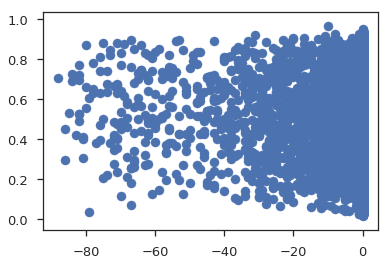

In [11]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_1);

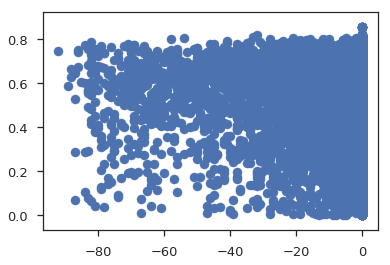

In [12]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_2);

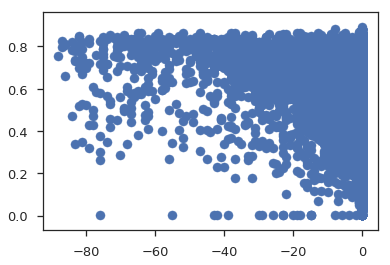

In [13]:
plt.scatter(data_recency.MONTHS_BALANCE, data_recency.EXT_SOURCE_3);

### Hypothesis: Max Annuity of the approved previous credit and current annuity

In [55]:
max_annuity_prev_app = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'AMT_ANNUITY']]\
                               .groupby('SK_ID_CURR')['AMT_ANNUITY'].max()

max_annuity_prev_app = app_train.SK_ID_CURR.map(max_annuity_prev_app)
max_annuity_prev_app[max_annuity_prev_app.isnull()].shape[0] / len(max_annuity_prev_app)

0.056739433711314395

In [56]:
diff_curr_annuity_max_annuity_prev_app = app_train.AMT_ANNUITY - max_annuity_prev_app

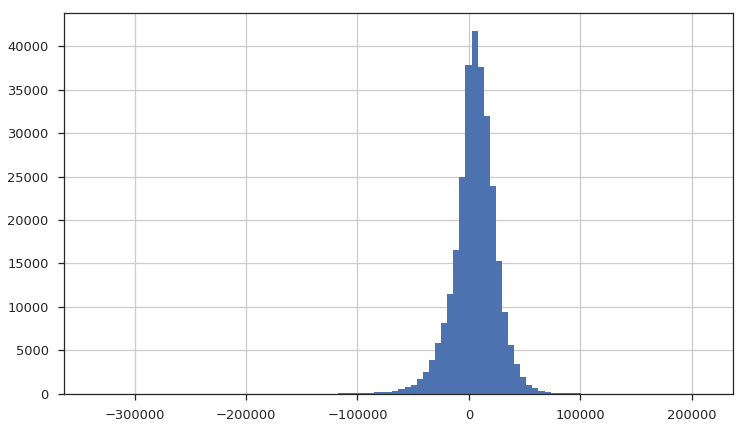

In [58]:
plt.figure(figsize=(12, 7))
diff_curr_annuity_max_annuity_prev_app.hist(bins=100);

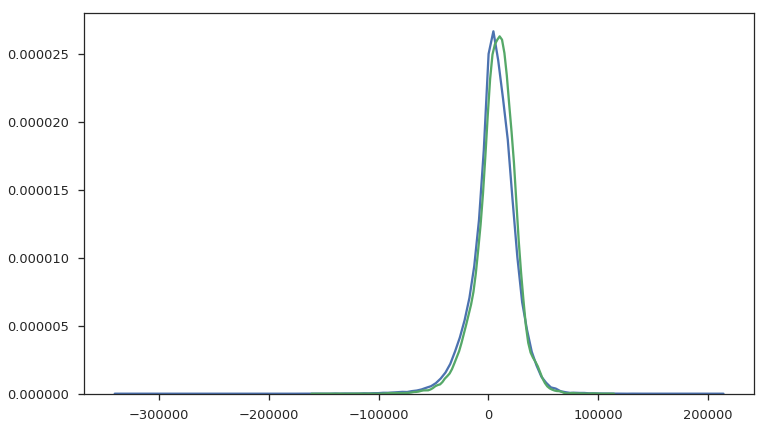

In [59]:
plt.figure(figsize=(12, 7))
sns.kdeplot(diff_curr_annuity_max_annuity_prev_app[app_train.TARGET == 0])
sns.kdeplot(diff_curr_annuity_max_annuity_prev_app[app_train.TARGET == 1]);

In [69]:
ratio_curr_annuity_max_annuity_prev_app = (app_train.AMT_ANNUITY / max_annuity_prev_app).replace([-np.inf, np.inf], np.nan)

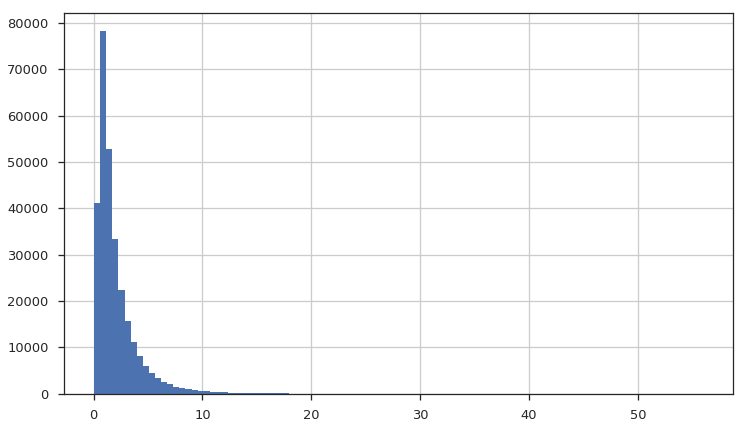

In [70]:
plt.figure(figsize=(12, 7))
ratio_curr_annuity_max_annuity_prev_app.hist(bins=100);

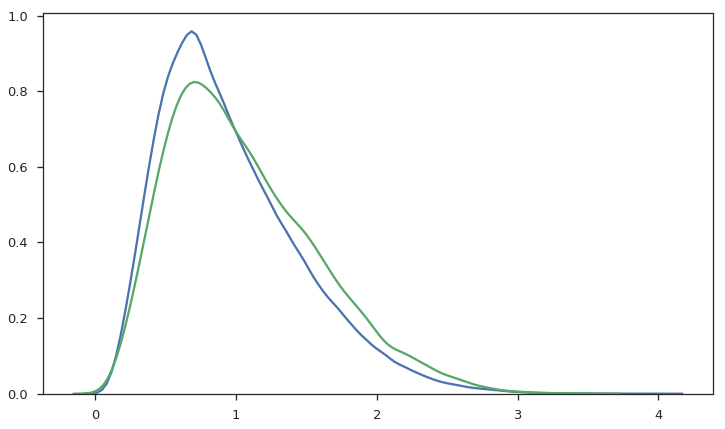

In [72]:
plt.figure(figsize=(12, 7))
sns.kdeplot(ratio_curr_annuity_max_annuity_prev_app[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(ratio_curr_annuity_max_annuity_prev_app[app_train.TARGET == 1].map(np.log1p));

### Relationship between debt, credit and credit enddate

In [39]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0) & (bureau.DAYS_CREDIT_ENDDATE > 0)
ratio_debt_credit = bureau.loc[mask, 'AMT_CREDIT_SUM'] - bureau.loc[mask, 'AMT_CREDIT_SUM_DEBT']
ratio_debt_credit_by_enddate = (ratio_debt_credit / bureau.loc[mask, 'DAYS_CREDIT_ENDDATE']).replace([-np.inf, np.inf], np.nan)
tmp = ratio_debt_credit_by_enddate.groupby(bureau.loc[mask, 'SK_ID_CURR']).mean()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.4489823128278338

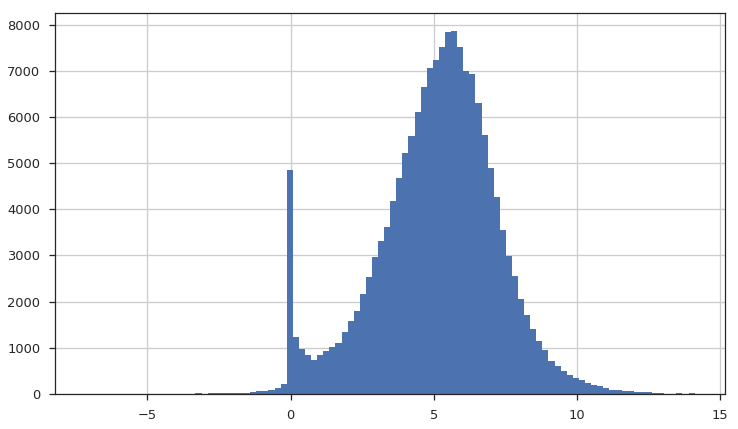

In [36]:
plt.figure(figsize=(12, 7))
tmp.map(np.log1p).hist(bins=100);

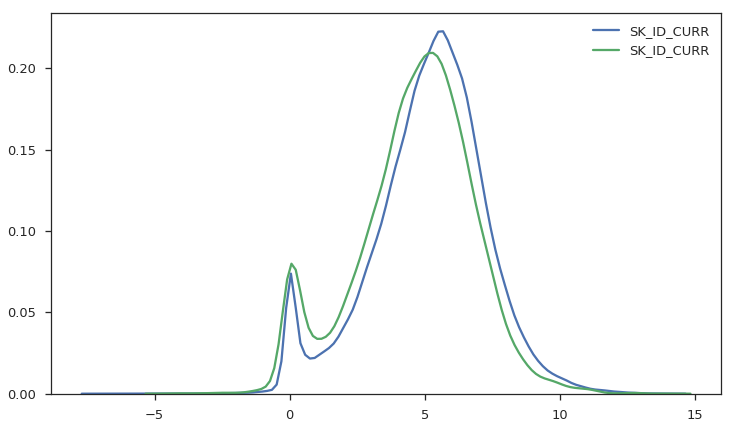

In [37]:
plt.figure(figsize=(12, 7))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Relationship between debt, credit and credit enddate and age, employed since.

In [40]:
mask = (bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0) & (bureau.DAYS_CREDIT_ENDDATE > 0)
ratio_debt_credit = bureau.loc[mask, 'AMT_CREDIT_SUM'] - bureau.loc[mask, 'AMT_CREDIT_SUM_DEBT']
ratio_debt_credit_by_enddate = (ratio_debt_credit / bureau.loc[mask, 'DAYS_CREDIT_ENDDATE']).replace([-np.inf, np.inf], np.nan)
tmp = ratio_debt_credit_by_enddate.groupby(bureau.loc[mask, 'SK_ID_CURR']).sum()
tmp = app_train.SK_ID_CURR.map(tmp) * ((-app_train.DAYS_EMPLOYED.replace({365243: np.nan}) / 365) / (-app_train.DAYS_BIRTH / 365))

tmp[tmp.isnull()].shape[0] / len(tmp)

0.5431415461560725

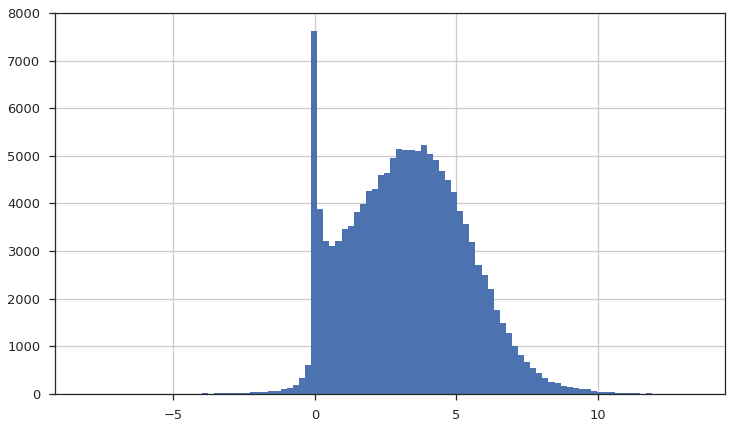

In [41]:
plt.figure(figsize=(12, 7))
tmp.map(np.log1p).hist(bins=100);

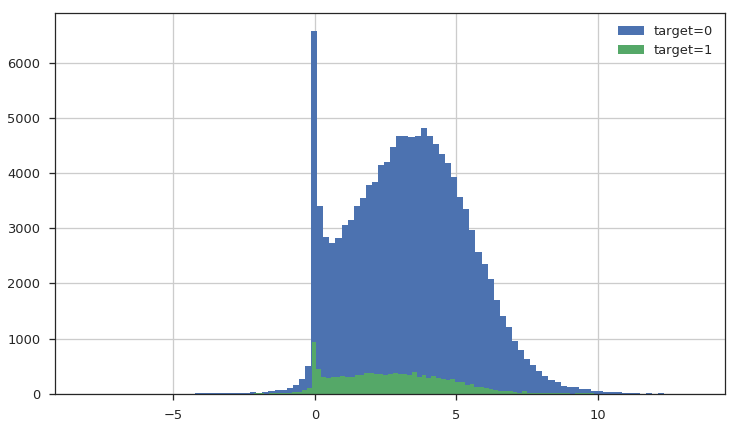

In [42]:
plt.figure(figsize=(12, 7))
tmp[app_train.TARGET == 0].map(np.log1p).hist(bins=100, label='target=0')
tmp[app_train.TARGET == 1].map(np.log1p).hist(bins=100, label='target=1')
plt.legend(loc='best');

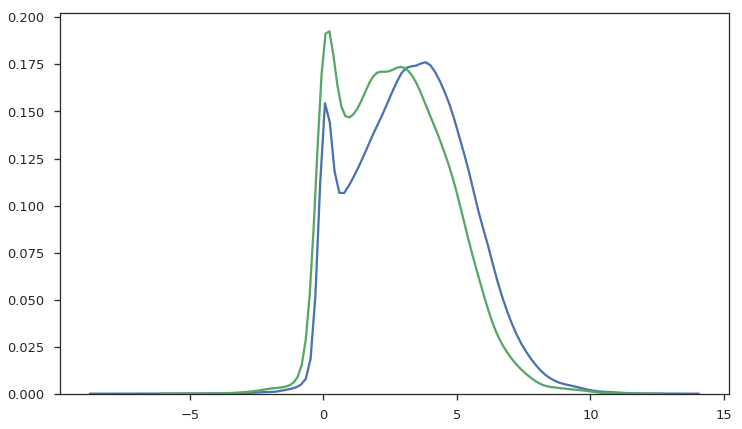

In [43]:
plt.figure(figsize=(12, 7))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p))
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p));

### Relationship between credit and lenght of pos_cash

In [74]:
mask = (prev_app.NAME_CONTRACT_STATUS == 'Approved') & (prev_app.NAME_CONTRACT_TYPE != 'Revolving loans')
credit_term = pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).size().reset_index().rename(columns={0: 'term'})
tmp = prev_app.loc[mask, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_CREDIT']].merge(credit_term, how='inner')
tmp.loc[:, 'ratio_credit_term'] = tmp.AMT_CREDIT / tmp.term
tmp = tmp.groupby('SK_ID_CURR')['ratio_credit_term'].std()
tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.3673429568373164

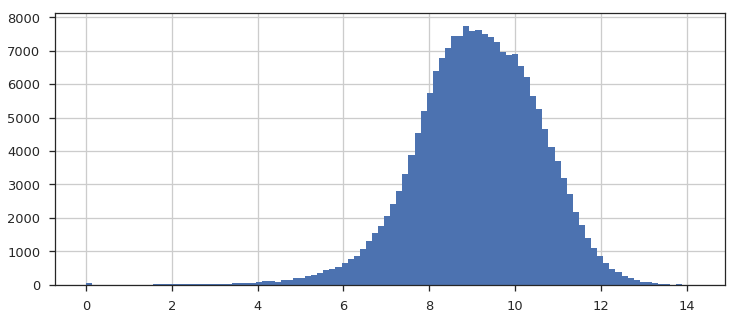

In [75]:
plt.figure(figsize=(12, 5))
tmp.map(np.log1p).hist(bins=100);

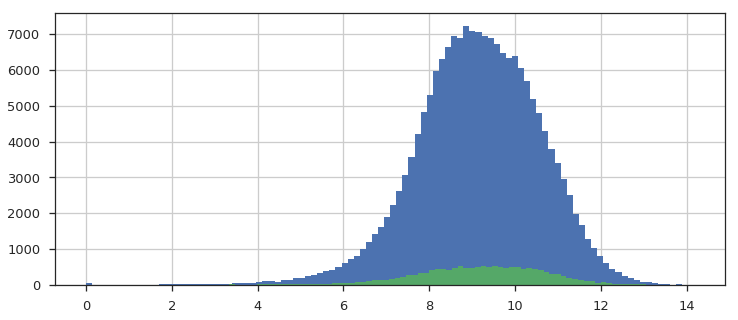

In [76]:
plt.figure(figsize=(12, 5))
tmp[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
tmp[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

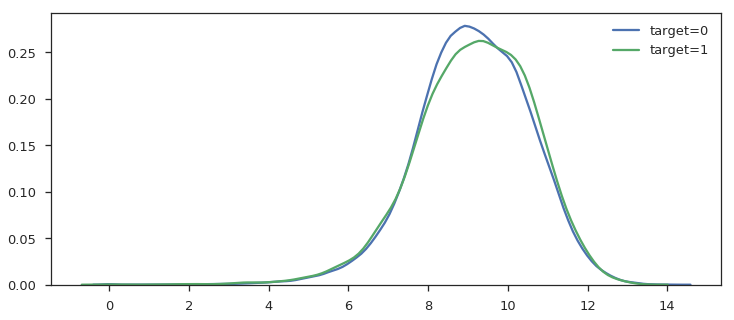

In [77]:
plt.figure(figsize=(12, 5))
sns.kdeplot(tmp[app_train.TARGET == 0].map(np.log1p), label='target=0')
sns.kdeplot(tmp[app_train.TARGET == 1].map(np.log1p), label='target=1');

### Relationship between loan start date from bureau and previous home credit applications and employment start date

In [100]:
mask   = bureau.CREDIT_ACTIVE == 'Active'
bureau_credit_start = bureau.loc[mask, ['SK_ID_CURR', 'DAYS_CREDIT']]

mask = prev_app.NAME_CONTRACT_STATUS == 'Approved'
prev_app_start = prev_app.loc[mask, ['SK_ID_CURR', 'DAYS_DECISION']]

In [120]:
client_employ_bureau_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(bureau_credit_start, how='left')
client_employ_bureau_loan_dates['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

client_employ_hc_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(prev_app_start, how='left')

In [117]:
client_employ_bureau_loan_dates.loc[:, 'loan_before_employment'] = (client_employ_bureau_loan_dates.DAYS_CREDIT > client_employ_bureau_loan_dates.DAYS_EMPLOYED).astype(np.uint8)
client_employ_hc_loan_dates.loc[:, 'loan_before_employment'] = (client_employ_hc_loan_dates.DAYS_DECISION > client_employ_hc_loan_dates.DAYS_EMPLOYED).astype(np.uint8)

btmp = client_employ_bureau_loan_dates.groupby('SK_ID_CURR')['loan_before_employment'].sum()
htmp = client_employ_hc_loan_dates.groupby('SK_ID_CURR')['loan_before_employment'].sum()
tmp  = btmp + htmp

tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.0

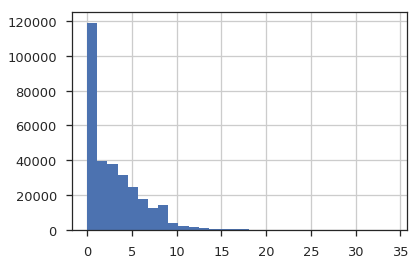

In [118]:
tmp.hist(bins=30);

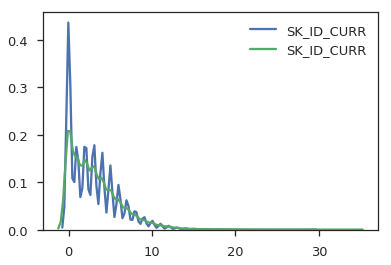

In [119]:
sns.kdeplot(tmp[app_train.TARGET == 0])
sns.kdeplot(tmp[app_train.TARGET == 1]);

In [136]:
client_employ_bureau_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(bureau_credit_start, how='left')
client_employ_bureau_loan_dates['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

client_employ_hc_loan_dates = app_train.loc[:, ['SK_ID_CURR', 'DAYS_EMPLOYED', 'TARGET']]\
                                           .merge(prev_app_start, how='left')

client_employ_bureau_loan_dates.loc[:, 'diff_loan_before_employment'] = (client_employ_bureau_loan_dates.DAYS_CREDIT - client_employ_bureau_loan_dates.DAYS_EMPLOYED)
client_employ_hc_loan_dates.loc[:, 'diff_loan_before_employment'] = (client_employ_hc_loan_dates.DAYS_DECISION - client_employ_hc_loan_dates.DAYS_EMPLOYED)

btmp = client_employ_bureau_loan_dates.groupby('SK_ID_CURR')['diff_loan_before_employment'].sum()
htmp = client_employ_hc_loan_dates.groupby('SK_ID_CURR')['diff_loan_before_employment'].sum()
tmp  = btmp + htmp

tmp = app_train.SK_ID_CURR.map(tmp)

tmp[tmp.isnull()].shape[0] / len(tmp)

0.0

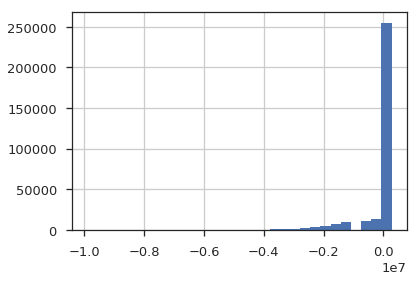

In [137]:
tmp.hist(bins=30);

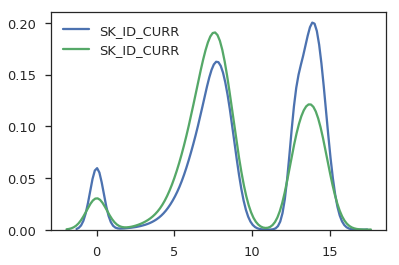

In [138]:
sns.kdeplot((-tmp[app_train.TARGET == 0]).map(np.log1p))
sns.kdeplot((-tmp[app_train.TARGET == 1]).map(np.log1p));